### Task 1:

In [98]:
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

In [99]:
train_df = pd.read_csv(r'D:\ML\Labs\lab 3\occupancy_train.txt')
test_df = pd.read_csv(r'D:\ML\Labs\lab 3\occupancy_test.txt')

In [100]:
X_train = train_df[['Humidity', 'Light', 'HumidityRatio']]
Y_train = train_df['Occupancy']

In [101]:
X_test = test_df[['Humidity', 'Light', 'HumidityRatio']]
Y_test = test_df['Occupancy']

In [102]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [103]:
accuracies = {}

for k in range(1,11):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_scaled, Y_train)
    y_pred = knn.predict(X_test_scaled)
    acc = accuracy_score(Y_test, y_pred)
    accuracies[k] = acc

In [104]:
best_k = max(accuracies, key=accuracies.get)
best_acc = accuracies[best_k]

print("Highest accuracy: ", best_acc)
print("Correspinding K value: ", best_k)

Highest accuracy:  0.9568480300187617
Correspinding K value:  9


### Task 3:

In [105]:
import numpy as np
from sklearn import datasets
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split

In [106]:
dataset = datasets.load_iris()
x = dataset.data
y = dataset.target
names = dataset.target_names

In [107]:
xtrain , xtest, ytrain, ytest = train_test_split(x, y, test_size=0.2, stratify=y)

In [108]:
def chi_square(a, b):
    return np.sum(((a-b)**2)/(a+b))

In [109]:
def knn(X_train, ytrain, xtest, k=3):
    predictions = []
    for x in xtest:
        distances = [chi_square(x, xtrain) for xtrain in X_train]
        k_indices = np.argsort(distances)[:k]
        k_labels = ytrain[k_indices]
        unique, counts = np.unique(k_labels, return_counts = True)
        predictions.append(unique[np.argmax(counts)])
    return np.array(predictions)

In [110]:
ypred = knn(xtrain, ytrain, xtest, k=3)

acc = accuracy_score(ytest, ypred)
con_mat = confusion_matrix(ytest, ypred)

In [111]:
print(f"Accuracy: {acc * 100:.2f}%")
print("\nConfusion Matrix:")
print(con_mat)

Accuracy: 100.00%

Confusion Matrix:
[[10  0  0]
 [ 0 10  0]
 [ 0  0 10]]


### Task 3:

In [112]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [113]:
df = pd.read_csv(r'D:\ML\Labs\lab 3\cancer patient data sets (1).csv')

In [114]:
df.head()

,index,Patient Id,Age,Gender,Air Pollution,Alcohol use,Dust Allergy,OccuPational Hazards,Genetic Risk,chronic Lung Disease,...,Fatigue,Weight Loss,Shortness of Breath,Wheezing,Swallowing Difficulty,Clubbing of Finger Nails,Frequent Cold,Dry Cough,Snoring,Level
0,0,P1,33,1,2,4,5,4,3,2,...,3,4,2,2,3,1,2,3,4,Low
1,1,P10,17,1,3,1,5,3,4,2,...,1,3,7,8,6,2,1,7,2,Medium
2,2,P100,35,1,4,5,6,5,5,4,...,8,7,9,2,1,4,6,7,2,High
3,3,P1000,37,1,7,7,7,7,6,7,...,4,2,3,1,4,5,6,7,5,High
4,4,P101,46,1,6,8,7,7,7,6,...,3,2,4,1,4,2,4,2,3,High


In [115]:
df.shape

(1000, 26)

In [116]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 26 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   index                     1000 non-null   int64 
 1   Patient Id                1000 non-null   object
 2   Age                       1000 non-null   int64 
 3   Gender                    1000 non-null   int64 
 4   Air Pollution             1000 non-null   int64 
 5   Alcohol use               1000 non-null   int64 
 6   Dust Allergy              1000 non-null   int64 
 7   OccuPational Hazards      1000 non-null   int64 
 8   Genetic Risk              1000 non-null   int64 
 9   chronic Lung Disease      1000 non-null   int64 
 10  Balanced Diet             1000 non-null   int64 
 11  Obesity                   1000 non-null   int64 
 12  Smoking                   1000 non-null   int64 
 13  Passive Smoker            1000 non-null   int64 
 14  Chest Pain               

In [117]:
df.describe()

,index,Age,Gender,Air Pollution,Alcohol use,Dust Allergy,OccuPational Hazards,Genetic Risk,chronic Lung Disease,Balanced Diet,...,Coughing of Blood,Fatigue,Weight Loss,Shortness of Breath,Wheezing,Swallowing Difficulty,Clubbing of Finger Nails,Frequent Cold,Dry Cough,Snoring
count,1000.000000,1000.000000,1000.000000,1000.0000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,...,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,499.500000,37.174000,1.402000,3.8400,4.563000,5.165000,4.840000,4.580000,4.380000,4.491000,...,4.859000,3.856000,3.855000,4.240000,3.777000,3.746000,3.923000,3.536000,3.853000,2.926000
std,288.819436,12.005493,0.490547,2.0304,2.620477,1.980833,2.107805,2.126999,1.848518,2.135528,...,2.427965,2.244616,2.206546,2.285087,2.041921,2.270383,2.388048,1.832502,2.039007,1.474686
min,0.000000,14.000000,1.000000,1.0000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,249.750000,27.750000,1.000000,2.0000,2.000000,4.000000,3.000000,2.000000,3.000000,2.000000,...,3.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000
50%,499.500000,36.000000,1.000000,3.0000,5.000000,6.000000,5.000000,5.000000,4.000000,4.000000,...,4.000000,3.000000,3.000000,4.000000,4.000000,4.000000,4.000000,3.000000,4.000000,3.000000
75%,749.250000,45.000000,2.000000,6.0000,7.000000,7.000000,7.000000,7.000000,6.000000,7.000000,...,7.000000,5.000000,6.000000,6.000000,5.000000,5.000000,5.000000,5.000000,6.000000,4.000000
max,999.000000,73.000000,2.000000,8.0000,8.000000,8.000000,8.000000,7.000000,7.000000,7.000000,...,9.000000,9.000000,8.000000,9.000000,8.000000,8.000000,9.000000,7.000000,7.000000,7.000000


#### Checking if the dataset is balanced or not:

In [118]:
print(df['Level'].value_counts())

Level
High      365
Medium    332
Low       303
Name: count, dtype: int64


#### Handling missing values and duplicates:

In [119]:
print("Number of duplicates in the dataset: ", df.duplicated().sum())

Number of duplicates in the dataset:  0


In [120]:
print("Number of NULL values in the dataset: ", df.isnull().sum())

Number of NULL values in the dataset:  index                       0
Patient Id                  0
Age                         0
Gender                      0
Air Pollution               0
Alcohol use                 0
Dust Allergy                0
OccuPational Hazards        0
Genetic Risk                0
chronic Lung Disease        0
Balanced Diet               0
Obesity                     0
Smoking                     0
Passive Smoker              0
Chest Pain                  0
Coughing of Blood           0
Fatigue                     0
Weight Loss                 0
Shortness of Breath         0
Wheezing                    0
Swallowing Difficulty       0
Clubbing of Finger Nails    0
Frequent Cold               0
Dry Cough                   0
Snoring                     0
Level                       0
dtype: int64


#### there are no null values or duplicates in the dataset

In [121]:
x = df.drop(columns=['index', 'Patient Id', 'Level'])
y = df['Level']

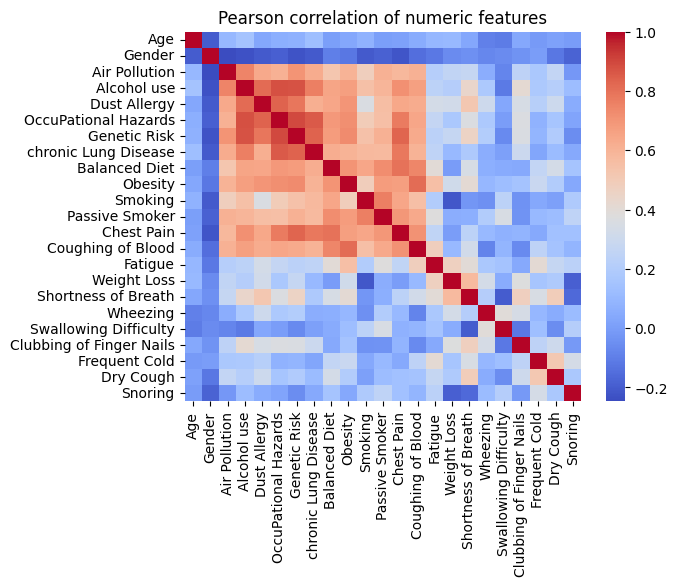

In [122]:

sns.heatmap(x.corr(method='pearson'), cmap='coolwarm')
plt.title('Pearson correlation of numeric features')
plt.show()

In [123]:
correlation_matrix = x.corr().abs()
upper = correlation_matrix.where(np.triu(np.ones(correlation_matrix.shape), k=1).astype(bool))
to_drop = [col for col in upper.columns if any(upper[col]>0.8)]
x_selected = x.drop(columns=to_drop)

In [124]:
print('Removed due to high corr:', to_drop)
print('Remaining features:', x_selected.shape[1])

Removed due to high corr: ['Dust Allergy', 'OccuPational Hazards', 'Genetic Risk', 'chronic Lung Disease', 'Chest Pain', 'Coughing of Blood']
Remaining features: 17


In [125]:
x_selected.describe()

,Age,Gender,Air Pollution,Alcohol use,Balanced Diet,Obesity,Smoking,Passive Smoker,Fatigue,Weight Loss,Shortness of Breath,Wheezing,Swallowing Difficulty,Clubbing of Finger Nails,Frequent Cold,Dry Cough,Snoring
count,1000.000000,1000.000000,1000.0000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,37.174000,1.402000,3.8400,4.563000,4.491000,4.465000,3.948000,4.195000,3.856000,3.855000,4.240000,3.777000,3.746000,3.923000,3.536000,3.853000,2.926000
std,12.005493,0.490547,2.0304,2.620477,2.135528,2.124921,2.495902,2.311778,2.244616,2.206546,2.285087,2.041921,2.270383,2.388048,1.832502,2.039007,1.474686
min,14.000000,1.000000,1.0000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,27.750000,1.000000,2.0000,2.000000,2.000000,3.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000
50%,36.000000,1.000000,3.0000,5.000000,4.000000,4.000000,3.000000,4.000000,3.000000,3.000000,4.000000,4.000000,4.000000,4.000000,3.000000,4.000000,3.000000
75%,45.000000,2.000000,6.0000,7.000000,7.000000,7.000000,7.000000,7.000000,5.000000,6.000000,6.000000,5.000000,5.000000,5.000000,5.000000,6.000000,4.000000
max,73.000000,2.000000,8.0000,8.000000,7.000000,7.000000,8.000000,8.000000,9.000000,8.000000,9.000000,8.000000,8.000000,9.000000,7.000000,7.000000,7.000000


#### Split 1: (training/testing)

In [126]:
X_temp, X_test, y_temp, y_test = train_test_split(x_selected, y, test_size=0.2, stratify=y)

#### Split 2: (validation)

In [127]:
X_train, X_val, y_train, y_val = train_test_split(X_temp, y_temp, test_size=0.3, random_state=0, stratify=y_temp)

#### Scaling:

In [129]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

In [130]:
knn = KNeighborsClassifier(n_neighbors=5, metric='euclidean')
knn.fit(X_train_scaled, y_train)

,n_neighbors,5
,weights,'uniform'
,algorithm,'auto'
,leaf_size,30
,p,2
,metric,'euclidean'
,metric_params,None
,n_jobs,None


In [131]:
acc_train = accuracy_score(y_train, knn.predict(X_train_scaled))
acc_val = accuracy_score(y_val, knn.predict(X_val_scaled))

In [132]:
print('Euclidean – Train:', acc_train, 'Val:', acc_val)

Euclidean – Train: 1.0 Val: 1.0


In [133]:
metrics = ['euclidean', 'manhattan', 'minkowski']
k_range = range(1, 21)

In [134]:
results = []
for m in metrics:
    for k in k_range:
        model = KNeighborsClassifier(n_neighbors=k, metric=m)
        model.fit(X_train_scaled, y_train)
        tr = accuracy_score(y_train, model.predict(X_train_scaled))
        vl = accuracy_score(y_val,   model.predict(X_val_scaled))
        results.append({'metric':m, 'k':k, 'train_acc':tr, 'val_acc':vl})

results_df = pd.DataFrame(results)

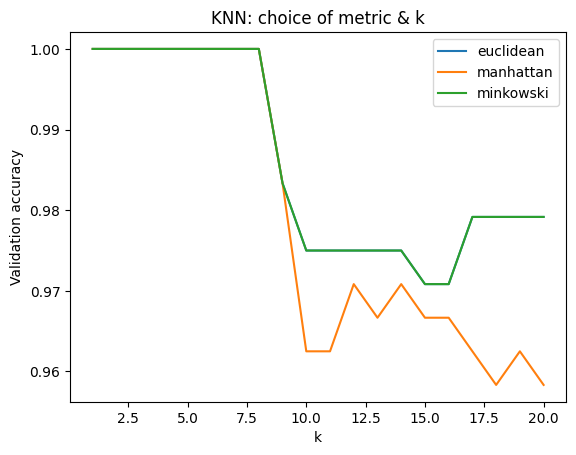

In [135]:
for m in metrics:
    sns.lineplot(data=results_df[results_df.metric==m],
                 x='k', y='val_acc', label=m)
plt.xlabel('k')
plt.ylabel('Validation accuracy')
plt.title('KNN: choice of metric & k')
plt.legend()
plt.show()

In [136]:
best = KNeighborsClassifier(n_neighbors=5, metric='manhattan')
best.fit(X_train_scaled, y_train)

print('Test accuracy:', accuracy_score(y_test, best.predict(X_test_scaled)))

Test accuracy: 1.0
